In [1]:
%matplotlib inline

In [2]:
# Importing Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import json
import requests
import matplotlib.ticker as ticker

# Functions

In [3]:
# Define function to plot the Time Series chart given the data frame
def date_close_plot(data_frame):
    
    labels = []
    ticks = []
    
    prev = pd.Timestamp(data_frame['date'][0]) ##
    prev_year = prev.year
    count = 0
    color = {"OIL":"black","SPHQ":"green","GOLD":"gold","BTC":"royalblue"}

    # Loop for collecting the different years and possition in the data frame and appending in the lists.
    for row in data_frame['date']: ##

        date = pd.Timestamp(row)
        year = date.year

        if year != prev_year:
            labels.append(year)
            ticks.append(row)

        prev_year = year


    # Creating the Time Series chart.
    x_values = data_frame["date"] ##
    y_values = data_frame["close"] ##
    
    symbol = data_frame["symbol"][1]
    fig_file = f"Charts/{str(symbol)}.png"
    
    plt.figure(figsize=(20,10))
    plt.plot(x_values, y_values, label = symbol, color = color[symbol])
    plt.xticks(ticks, labels = labels)
    plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('$%d'))

    plt.title(str(data_frame["symbol"][0]) + " Yearly Chart", size = 15)
    plt.xlabel("Year", size = 12)
    plt.ylabel(str(data_frame["symbol"][0]), size = 12)
    plt.legend(loc = 'upper right')
    
    plt.grid()
    
    plt.savefig(fig_file)
        
    plt.show()

In [4]:
# Define function to join two data frames and create a plot that compares their prices.
def join_and_graph(data_frame1,data_frame2):
    
    joined_df = data_frame1.merge(data_frame2, on="date")
    clean_df = joined_df[["date","symbol_x","close_x","symbol_y","close_y"]]
    
    x_values = clean_df["close_x"]
    y_values = clean_df["close_y"]
    symbol_x = clean_df["symbol_x"][1]
    symbol_y = clean_df["symbol_y"][1]
    
    fig_file = f"Charts/{str(symbol_x)}_{str(symbol_y)}.png"
    
    plt.figure(figsize = (20,10))
    plt.scatter(x_values,y_values, edgecolors = "black")
    plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('$%d'))
    plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('$%d'))
    
    plt.title(f"Relationship Between {symbol_x} and {symbol_y}", size = 15)
    plt.xlabel(symbol_x, size = 14)
    plt.ylabel(symbol_y, size = 14)
    
    slope, interception, r_value, p_value, std_err = st.linregress(x_values, y_values)
    
    line_eq = x_values * slope + interception
    plt.plot(x_values, line_eq, color = 'r')
    line_equation = f"y = {round(slope,2)}x + {round(interception,2)}"
    plt.annotate(line_equation,(min(x_values),max(y_values)),fontsize = 15, color = 'red')
    
    plt.grid()
    
    print(f"The correlation coefficient between {symbol_x} and {symbol_y} is {round(st.pearsonr(x_values,y_values)[0],2)}")
    
    plt.savefig(fig_file)
    
    plt.show()

# Reading the CSV files

In [5]:
#Set file path variable
file = "Resources/"

### Oil Data Frame & Plot

In [6]:
#Read oil csv file and show data frame
oil_df = pd.read_csv(file + "oil_csv.csv")
oil_df

,date,symbol,open,high,low,close,daily change (%)
0,2011-04-21,OIL,49.94,50.3500,49.90,50.35,0.820985
1,2011-04-25,OIL,50.57,50.5700,49.91,50.05,-1.028278
2,2011-04-26,OIL,50.18,50.4300,50.10,50.30,0.239139
3,2011-04-27,OIL,50.35,50.8500,49.80,50.81,0.913605
4,2011-04-28,OIL,50.78,51.1600,50.17,50.70,-0.157542
...,...,...,...,...,...,...,...
2968,2023-02-07,OIL,28.52,29.5000,28.52,29.50,3.436185
2969,2023-02-08,OIL,29.75,29.8600,29.37,29.79,0.134454
2970,2023-02-09,OIL,29.67,29.7000,29.25,29.55,-0.404449
2971,2023-02-10,OIL,30.00,30.3999,29.98,30.30,1.000000


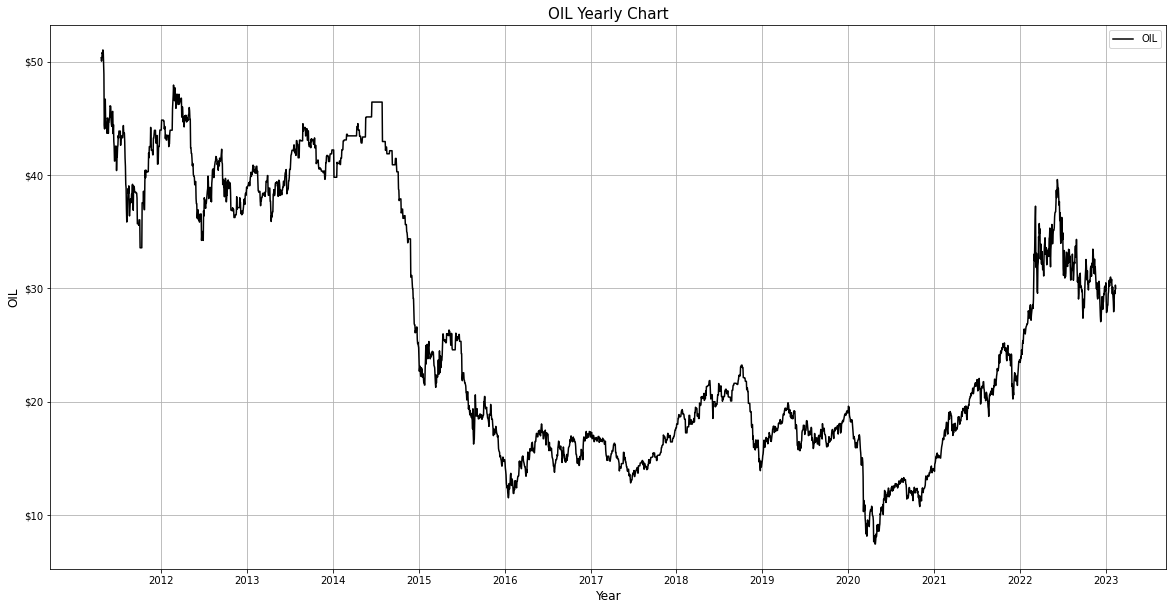

In [7]:
#Plot function for historical oil data
date_close_plot(oil_df)

### Gold Data Frame & Plot

In [8]:
#Read csv file and show data frame
gold_df = pd.read_csv(file+"gold_csv.csv")
gold_df

,date,symbol,open,high,low,close,daily change (%)
0,1999-11-01,GOLD,18.00,18.06,17.56,17.81,-1.055556
1,1999-11-02,GOLD,17.81,18.25,17.63,18.25,2.470522
2,1999-11-03,GOLD,18.19,18.25,17.75,17.88,-1.704233
3,1999-11-04,GOLD,17.69,17.94,17.56,17.69,0.000000
4,1999-11-05,GOLD,17.56,17.69,17.13,17.19,-2.107062
...,...,...,...,...,...,...,...
5854,2023-02-07,GOLD,18.35,18.69,18.19,18.50,0.817439
5855,2023-02-08,GOLD,18.54,18.56,18.11,18.34,-1.078749
5856,2023-02-09,GOLD,18.54,18.64,17.61,17.81,-3.937433
5857,2023-02-10,GOLD,17.79,18.05,17.69,17.93,0.786959


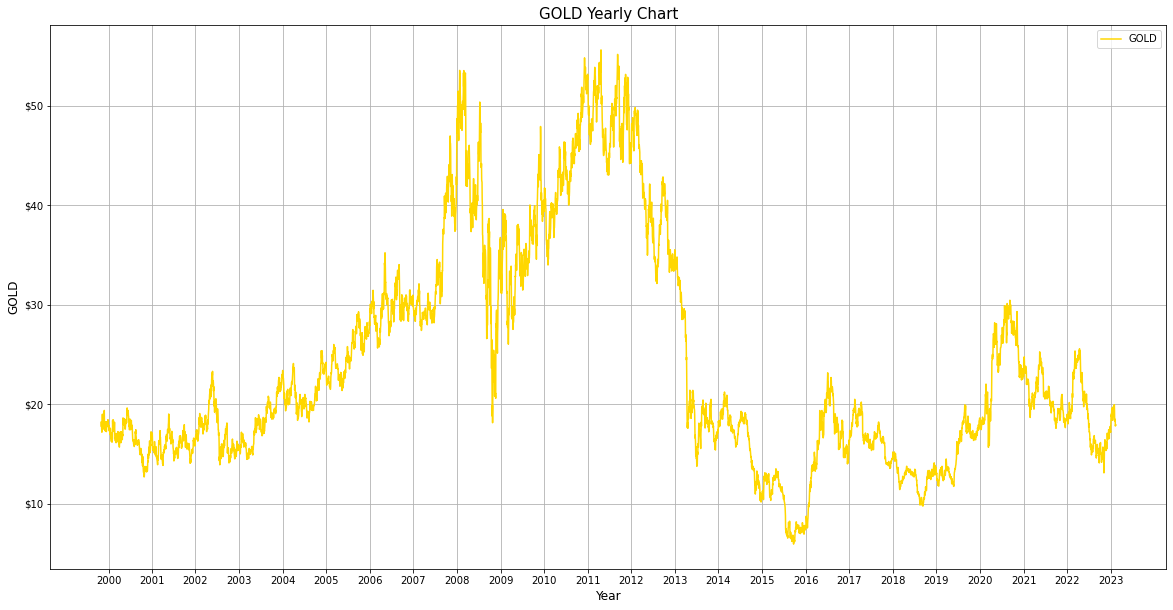

In [9]:
#Plot function for historically for gold
date_close_plot(gold_df)

### S&P500 Data Frame & Plot

In [10]:
#Read csv file and show data frame
sp500_df = pd.read_csv(file + "sphq_csv.csv")
sp500_df

,date,symbol,open,high,low,close,daily change (%)
0,2005-12-06,SPHQ,15.47,15.690,15.470,15.60,0.840336
1,2005-12-07,SPHQ,15.60,15.620,15.420,15.44,-1.025641
2,2005-12-08,SPHQ,15.45,15.580,15.439,15.52,0.453074
3,2005-12-09,SPHQ,15.59,15.740,15.470,15.57,-0.128287
4,2005-12-12,SPHQ,15.75,15.800,15.590,15.67,-0.507937
...,...,...,...,...,...,...,...
4320,2023-02-07,SPHQ,46.44,47.340,46.420,47.21,1.658053
4321,2023-02-08,SPHQ,47.03,47.150,46.520,46.58,-0.956836
4322,2023-02-09,SPHQ,47.00,47.070,46.190,46.31,-1.468085
4323,2023-02-10,SPHQ,46.28,46.570,46.200,46.54,0.561798


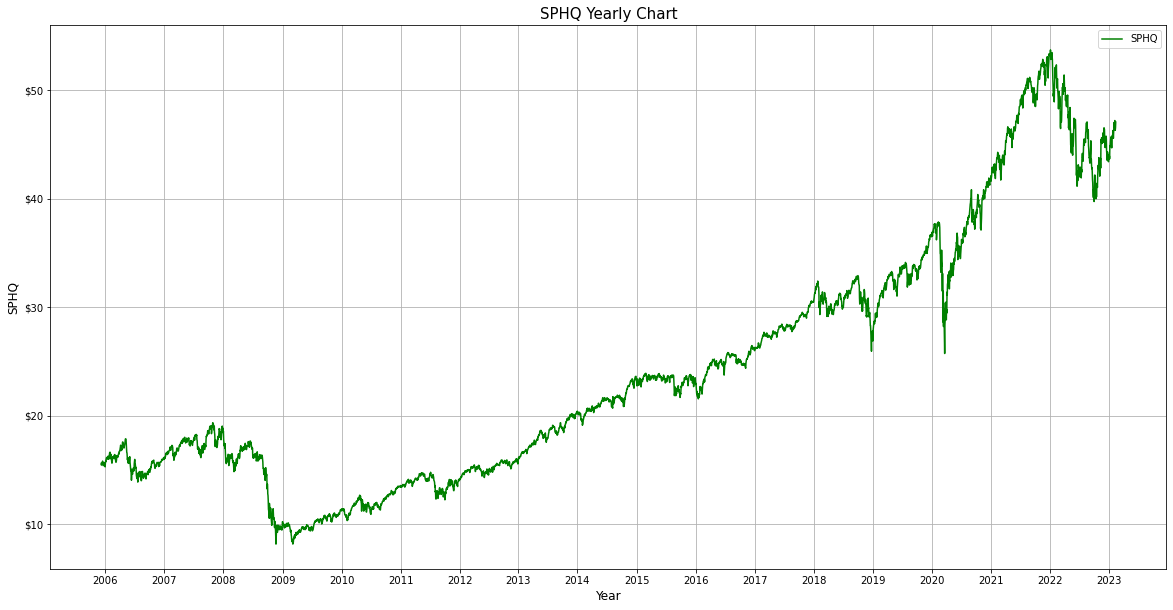

In [11]:
#Plot function for sp500 historical
date_close_plot(sp500_df)

### Bitcoin Data Frame & Plot

In [12]:
#Read csv file to notebook and display data frame
bitcoin_df = pd.read_csv(file + "btc_joined.csv")
bitcoin_df

,date,symbol,open,high,low,close,daily change (%)
0,2013-10-01,BTC,124.30466,124.75166,122.56349,123.65499,-0.522643
1,2013-10-02,BTC,123.65499,125.75850,123.63383,125.45500,1.455671
2,2013-10-03,BTC,125.45500,125.66566,83.32833,108.58483,-13.447188
3,2013-10-04,BTC,108.58483,118.67500,107.05816,118.67466,9.292118
4,2013-10-05,BTC,118.67466,121.93633,118.00566,121.33866,2.244793
...,...,...,...,...,...,...,...
3522,2023-02-10,BTC,21797.83000,21938.16000,21451.00000,21625.19000,-0.792005
3523,2023-02-11,BTC,21625.19000,21906.32000,21599.78000,21862.55000,1.097609
3524,2023-02-12,BTC,21862.02000,22090.00000,21630.00000,21783.54000,-0.358979
3525,2023-02-13,BTC,21782.37000,21894.99000,21351.07000,21773.97000,-0.038563


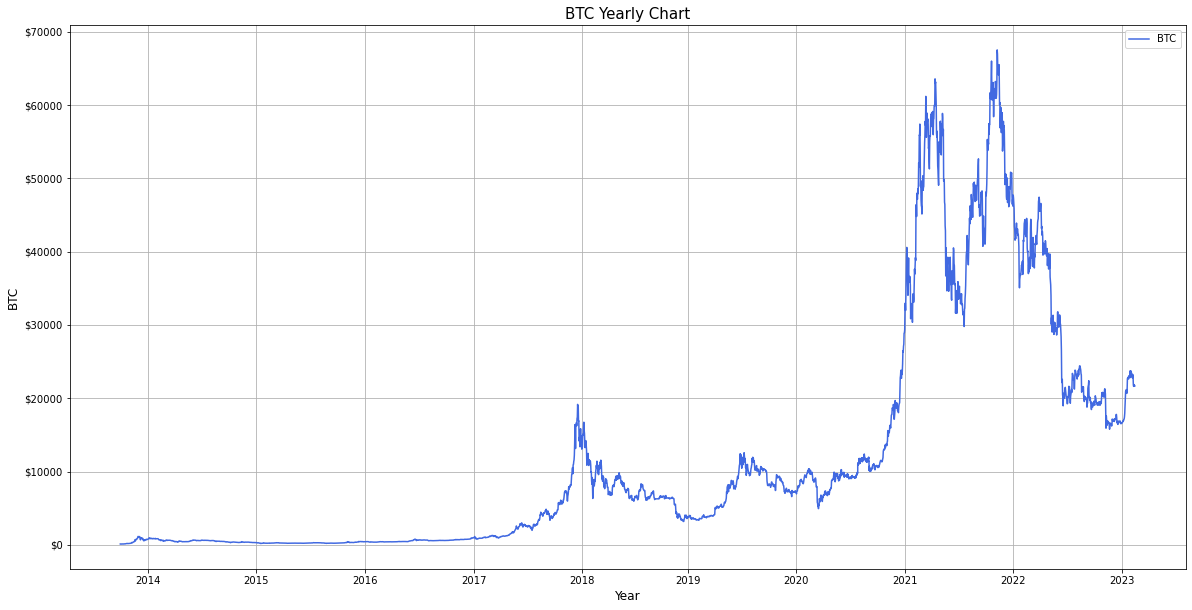

In [13]:
date_close_plot(bitcoin_df)

# Gold, S&P500, and OIL in One Chart

In [14]:
gold_df2 = gold_df.loc[gold_df['date'] > '2010-01-01']
sp500_df2 = sp500_df.loc[sp500_df['date'] > '2010-01-01']

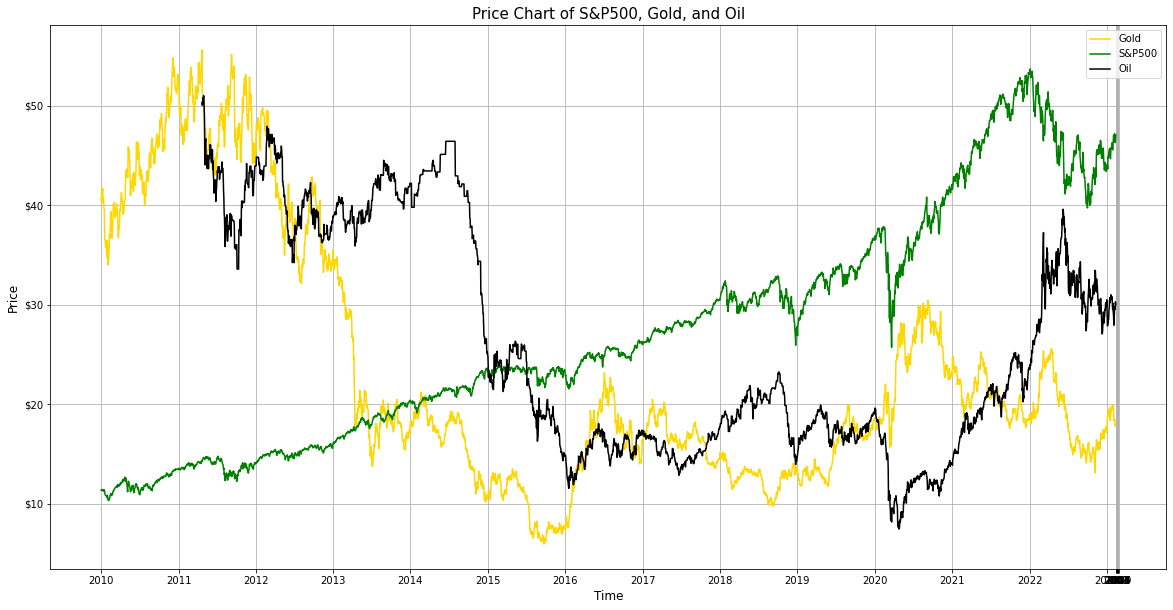

In [15]:
#Plot oil, gold, and sp500 on one chart for comparison
plt.figure(figsize = (20,10))
plt.plot(gold_df2['date'],gold_df2['close'], color = 'gold', label = "Gold")
plt.plot(sp500_df2['date'],sp500_df2['close'], color = 'green', label = "S&P500")
plt.plot(oil_df['date'],oil_df['close'], color = 'black', label = "Oil")

labels = []
ticks = []

prev = pd.Timestamp(gold_df['date'][0]) ##
prev_year = prev.year 
count = 0

for row in gold_df['date']: ##

    date = pd.Timestamp(row)
    year = date.year

    if year != prev_year:
        labels.append(year)
        ticks.append(row)

    prev_year = year

plt.xticks(ticks, labels = labels)
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('$%d'))
plt.legend(loc = 'best')

plt.xlabel("Time",size = 12)
plt.ylabel("Price", size = 12)
plt.title("Price Chart of S&P500, Gold, and Oil", size = 15)

plt.grid()

plt.savefig("Charts/SPHQ_Gold_Oil.png")

plt.show()

# Correlation Charts

The correlation coefficient between OIL and BTC is 0.01


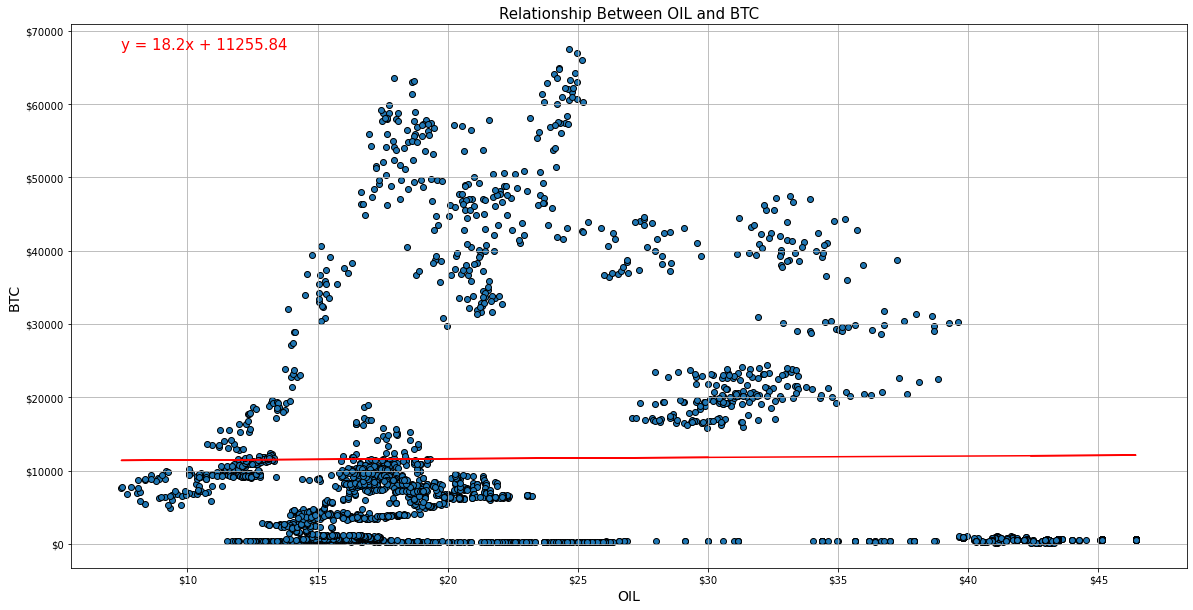

In [16]:
#Plot function for oil and bitcoin
join_and_graph(oil_df,bitcoin_df)

The correlation coefficient between SPHQ and BTC is 0.88


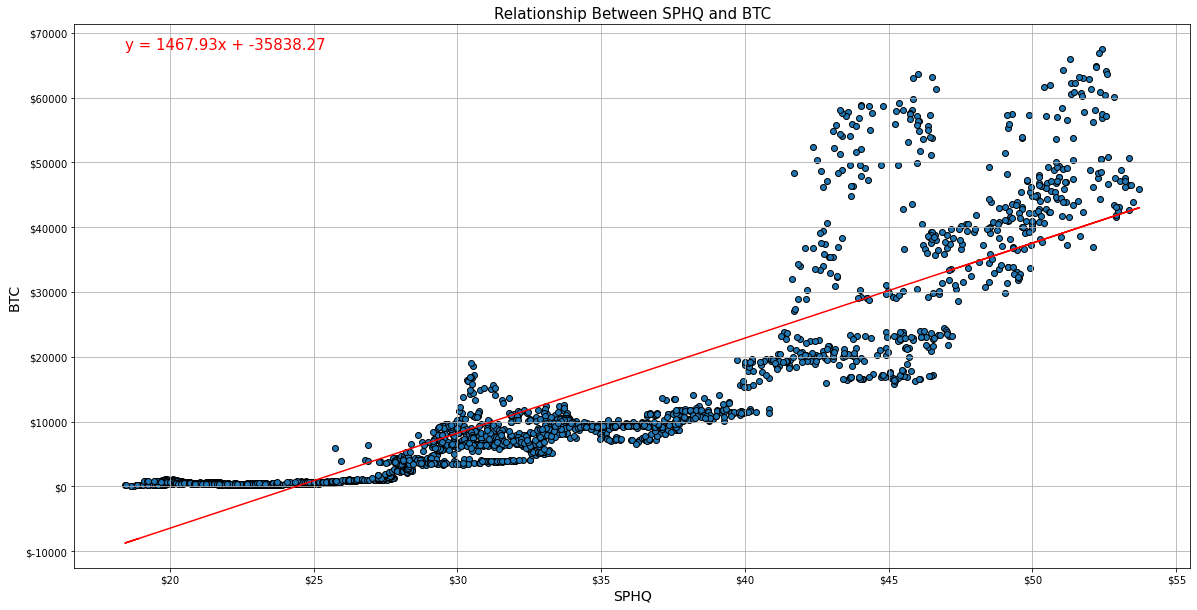

In [17]:
#Plot function for sp500 and bitcoin
join_and_graph(sp500_df,bitcoin_df)

The correlation coefficient between GOLD and BTC is 0.4


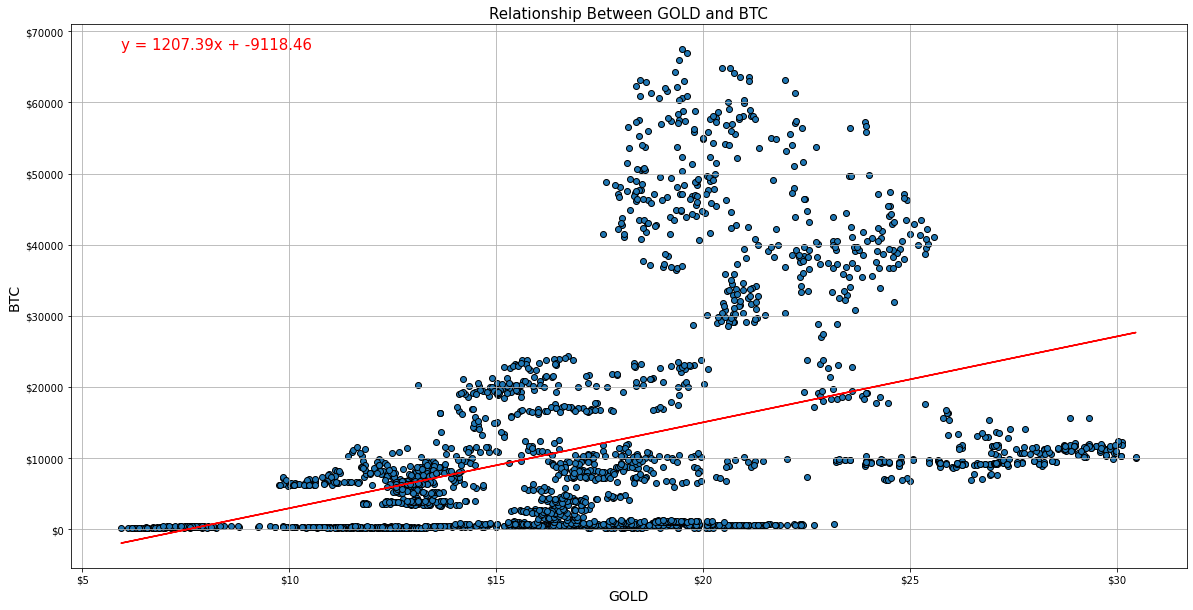

In [18]:
#Plot function for gold and bitcoin
join_and_graph(gold_df,bitcoin_df)

# BTC Short-term Investment of 6 Months

In [19]:
# Creating btc df that starts 6 months after the original
bitcoin_6month_df = bitcoin_df.iloc[183:3526,:]
bitcoin_6month_df = bitcoin_6month_df.reset_index()

In [20]:
# Joining both data frames to have the date of investment and the btc price 6 months later
compare_btc_df = bitcoin_df.join(bitcoin_6month_df,rsuffix = "_six")
compare_btc_df = compare_btc_df.dropna()

In [21]:
#Show dataframe
compare_btc_df

,date,symbol,open,high,low,close,daily change (%),index,date_six,symbol_six,open_six,high_six,low_six,close_six,daily change (%)_six
0,2013-10-01,BTC,124.30466,124.75166,122.56349,123.65499,-0.522643,183.0,2014-04-02,BTC,464.88000,500.64066,459.67830,480.16581,3.288120
1,2013-10-02,BTC,123.65499,125.75850,123.63383,125.45500,1.455671,184.0,2014-04-03,BTC,480.16581,494.98333,419.70500,427.87498,-10.890161
2,2013-10-03,BTC,125.45500,125.66566,83.32833,108.58483,-13.447188,185.0,2014-04-04,BTC,427.87498,456.34863,414.41333,432.99716,1.197121
3,2013-10-04,BTC,108.58483,118.67500,107.05816,118.67466,9.292118,186.0,2014-04-05,BTC,432.99716,455.99333,428.63000,453.87148,4.820891
4,2013-10-05,BTC,118.67466,121.93633,118.00566,121.33866,2.244793,187.0,2014-04-06,BTC,453.87148,465.63773,444.13629,462.44500,1.888975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3338,2022-08-10,BTC,23151.32000,24226.00000,22664.69000,23954.05000,3.467318,3521.0,2023-02-09,BTC,22961.85000,23011.39000,21688.00000,21796.35000,-5.075811
3339,2022-08-11,BTC,23954.05000,24918.54000,23852.13000,23934.39000,-0.082074,3522.0,2023-02-10,BTC,21797.83000,21938.16000,21451.00000,21625.19000,-0.792005
3340,2022-08-12,BTC,23933.09000,24456.50000,23583.00000,24403.68000,1.966273,3523.0,2023-02-11,BTC,21625.19000,21906.32000,21599.78000,21862.55000,1.097609
3341,2022-08-13,BTC,24401.70000,24888.00000,24291.22000,24441.38000,0.162612,3524.0,2023-02-12,BTC,21862.02000,22090.00000,21630.00000,21783.54000,-0.358979


In [22]:
# Calculate the percentage difference between the prices
price_dif_df = round(100 * (compare_btc_df["close_six"] - compare_btc_df["close"])/compare_btc_df["close"],2)
compare_btc_df["six_months_dif (%)"] = price_dif_df

In [23]:
compare_btc_df[["date","six_months_dif (%)"]]

,date,six_months_dif (%)
0,2013-10-01,288.31
1,2013-10-02,241.06
2,2013-10-03,298.76
3,2013-10-04,282.45
4,2013-10-05,281.12
...,...,...
3338,2022-08-10,-9.01
3339,2022-08-11,-9.65
3340,2022-08-12,-10.41
3341,2022-08-13,-10.87


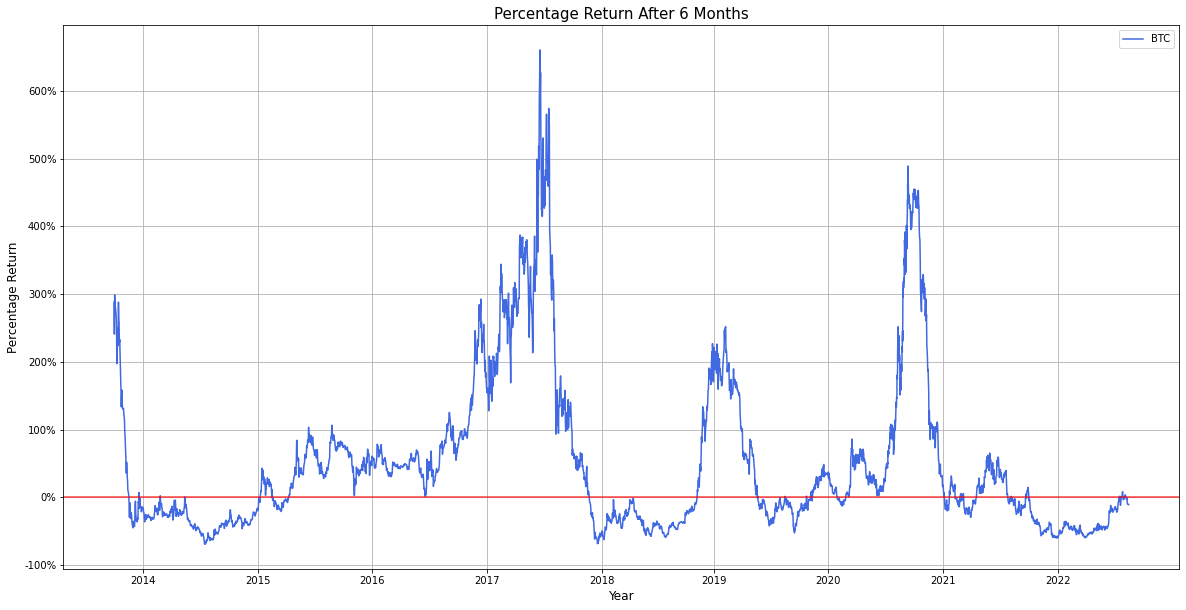

In [24]:
# Plot the percentage return by date
plt.figure(figsize = (20,10))
plt.plot(compare_btc_df["date"],compare_btc_df["six_months_dif (%)"], color = "royalblue", label = "BTC")

labels = []
ticks = []

prev = pd.Timestamp(compare_btc_df['date'][0])
prev_year = prev.year ##
count = 0

for row in compare_btc_df['date']: ##

    date = pd.Timestamp(row)
    year = date.year

    if year != prev_year:
        labels.append(year)
        ticks.append(row)

    prev_year = year

plt.xticks(ticks, labels = labels)
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter())
plt.axhline(y=0,color = 'red',alpha = 0.75)

plt.xlabel("Year", size = 12)
plt.ylabel("Percentage Return", size = 12)
plt.title("Percentage Return After 6 Months", size = 15)
plt.legend(loc='best')
plt.grid()

plt.savefig("Charts/six_month_btc_return.png")

plt.show()

This visualization shows in percentage how much return there is for each day since 2018 if the Bitcoin amount was sold exactly six months after it was bought. Meaning, if an investment is made for six months in Bitcoin, there is the posibility of making great profits, as we see the peaks in the visualization, from 100% to more than 600%. However, it is clear that a good proportion of the time the returns are negative, incurring losses. The proportion is that 56.98% of the time it would result in profits and 43.02% of the time it would result in losses. That indicates, Bitcoin is moderate or risky for short-term investment.

In [25]:
# Calculating the number of dates that produced profit/loss 6 months later.
profit = compare_btc_df.loc[compare_btc_df["six_months_dif (%)"] > 0]
loss = compare_btc_df.loc[compare_btc_df["six_months_dif (%)"] <= 0]

In [26]:
# Printing the percentage of the profit/loss days.
n_profit = len(profit)
n_loss = len(loss)
total = n_profit + n_loss
percent_profit = round(100*n_profit/total,2)
percent_loss = round(100 - percent_profit,2)
print(f"An investment of 6 months in a random date has the chance for profit {percent_profit}% of the time and for loss {percent_loss}% of the time.")

An investment of 6 months in a random date has the chance for profit 56.98% of the time and for loss 43.02% of the time.


# SP500 5 YRS Percentage Change

In [27]:
sp500_5yr_df = sp500_df.loc[sp500_df["date"] >= '2010-12-06']
sp500_5yr_df2 = sp500_5yr_df.reset_index()
sp500_5yr_return_df = sp500_df.join(sp500_5yr_df2,rsuffix = "_five")

sp500_5yr_return_df = sp500_5yr_return_df.dropna()

In [28]:
sp500_5yr_return_df.head()


,date,symbol,open,high,low,close,daily change (%),index,date_five,symbol_five,open_five,high_five,low_five,close_five,daily change (%)_five
0,2005-12-06,SPHQ,15.47,15.69,15.470,15.60,0.840336,1257.0,2010-12-06,SPHQ,13.24,13.31,13.21,13.25,0.075529
1,2005-12-07,SPHQ,15.60,15.62,15.420,15.44,-1.025641,1258.0,2010-12-07,SPHQ,13.39,13.39,13.25,13.25,-1.045556
2,2005-12-08,SPHQ,15.45,15.58,15.439,15.52,0.453074,1259.0,2010-12-08,SPHQ,13.25,13.30,13.22,13.27,0.150943
3,2005-12-09,SPHQ,15.59,15.74,15.470,15.57,-0.128287,1260.0,2010-12-09,SPHQ,13.34,13.34,13.27,13.29,-0.374813
4,2005-12-12,SPHQ,15.75,15.80,15.590,15.67,-0.507937,1261.0,2010-12-10,SPHQ,13.37,13.38,13.29,13.38,0.074794


### 5 yrs difference percentage

In [29]:
#Calculating the difference percentage for last 5 years
price_dif_df = round(100 * (sp500_5yr_return_df["close_five"] - sp500_5yr_return_df["close"])/sp500_5yr_return_df["close"],2)
sp500_5yr_return_df["5yrs_dif (%)"] = price_dif_df
sp500_5yr_return_df.head()

,date,symbol,open,high,low,close,daily change (%),index,date_five,symbol_five,open_five,high_five,low_five,close_five,daily change (%)_five,5yrs_dif (%)
0,2005-12-06,SPHQ,15.47,15.69,15.470,15.60,0.840336,1257.0,2010-12-06,SPHQ,13.24,13.31,13.21,13.25,0.075529,-15.06
1,2005-12-07,SPHQ,15.60,15.62,15.420,15.44,-1.025641,1258.0,2010-12-07,SPHQ,13.39,13.39,13.25,13.25,-1.045556,-14.18
2,2005-12-08,SPHQ,15.45,15.58,15.439,15.52,0.453074,1259.0,2010-12-08,SPHQ,13.25,13.30,13.22,13.27,0.150943,-14.50
3,2005-12-09,SPHQ,15.59,15.74,15.470,15.57,-0.128287,1260.0,2010-12-09,SPHQ,13.34,13.34,13.27,13.29,-0.374813,-14.64
4,2005-12-12,SPHQ,15.75,15.80,15.590,15.67,-0.507937,1261.0,2010-12-10,SPHQ,13.37,13.38,13.29,13.38,0.074794,-14.61


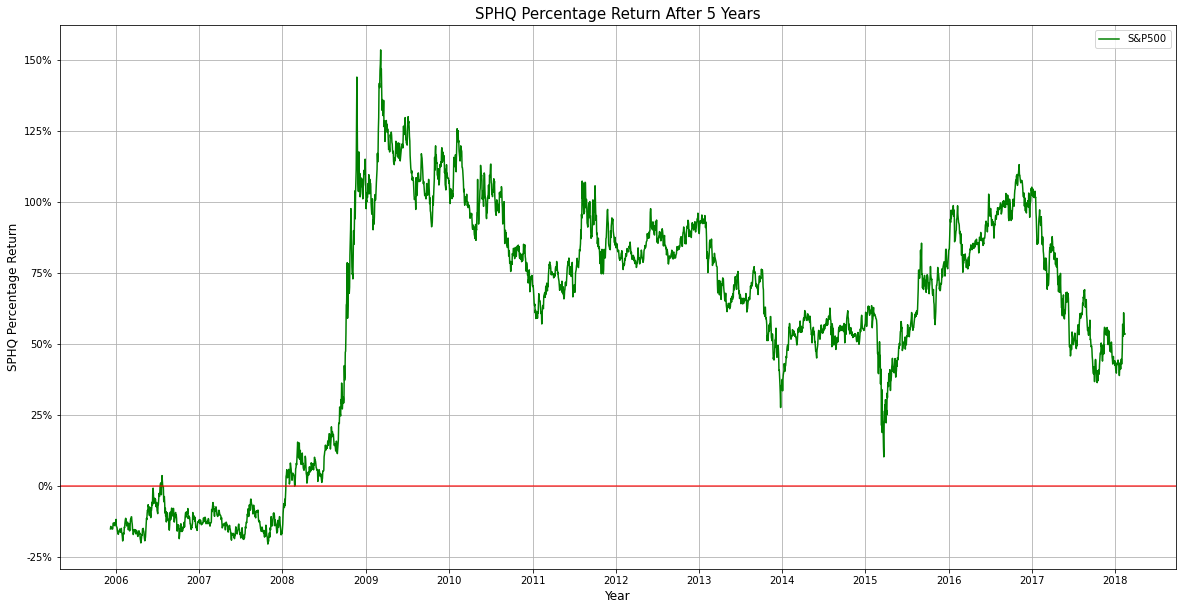

In [30]:
#Create chart for SPHQ 5 years
plt.figure(figsize = (20,10))
plt.plot(sp500_5yr_return_df["date"],sp500_5yr_return_df["5yrs_dif (%)"], color = 'green', label = "S&P500")

labels = []
ticks = []

prev = pd.Timestamp(sp500_5yr_return_df['date'][0])
prev_year = prev.year ##
count = 0

for row in sp500_5yr_return_df['date']: ##

    date = pd.Timestamp(row)
    year = date.year

    if year != prev_year:
        labels.append(year)
        ticks.append(row)

    prev_year = year

plt.xticks(ticks, labels = labels)
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter())
plt.axhline(y=0,color = 'red',alpha = 0.75)

plt.xlabel("Year", size = 12)
plt.ylabel("SPHQ Percentage Return", size = 12)
plt.title("SPHQ Percentage Return After 5 Years", size = 15)
plt.legend(loc = 'best')

plt.grid()

plt.savefig("Charts/sfive_years_sphq_return.png")

plt.show()

# Last 5 yrs plot of BTC with Regression Line

In [31]:
#Sort value to make data frame for 5 years bitcoin
btc_5yr_df = bitcoin_df.loc[bitcoin_df["date"] >= '2018-01-01']

In [32]:
btc_5yr_df = btc_5yr_df.reset_index()

In [33]:
btc_5yr_df

,index,date,symbol,open,high,low,close,daily change (%)
0,1553,2018-01-01,BTC,13062.14500,14213.44125,12587.60375,13439.41750,2.888289
1,1554,2018-01-02,BTC,13439.41750,13892.24250,12859.80250,13337.62125,-0.757445
2,1555,2018-01-03,BTC,13337.62125,15216.75625,12955.96500,14881.54500,11.575705
3,1556,2018-01-04,BTC,14881.54500,15394.98625,14588.59500,15104.45000,1.497862
4,1557,2018-01-05,BTC,15104.45000,15194.40625,14225.16625,14953.85250,-0.997041
...,...,...,...,...,...,...,...,...
1969,3522,2023-02-10,BTC,21797.83000,21938.16000,21451.00000,21625.19000,-0.792005
1970,3523,2023-02-11,BTC,21625.19000,21906.32000,21599.78000,21862.55000,1.097609
1971,3524,2023-02-12,BTC,21862.02000,22090.00000,21630.00000,21783.54000,-0.358979
1972,3525,2023-02-13,BTC,21782.37000,21894.99000,21351.07000,21773.97000,-0.038563


In [34]:
#Calculating the daily change for 5 years for bitcoin
mean_5yr = btc_5yr_df["daily change (%)"].mean()
mean_5yr

0.11565377855234525

The Stadard error of regression is 0.4169493838313609


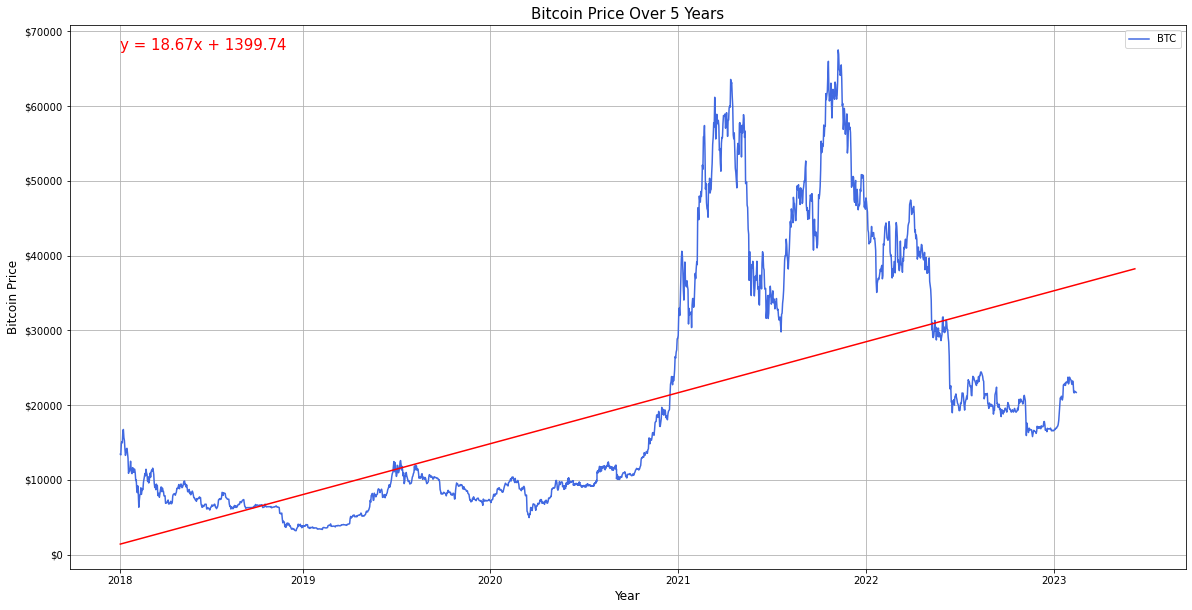

In [35]:
#Plot bitcoin 5 year price
x_values = btc_5yr_df.index
y_values = btc_5yr_df["close"]


plt.figure(figsize = (20,10))
plt.plot(btc_5yr_df["date"],y_values, color = "royalblue", label = "BTC")
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('$%d'))

labels = []
ticks = []

prev = pd.Timestamp(btc_5yr_df['date'][0])
prev_year = 0 ##
count = 0

for row in btc_5yr_df['date']: ##

    date = pd.Timestamp(row)
    year = date.year

    if year != prev_year:
        labels.append(year)
        ticks.append(row)

    prev_year = year

plt.xticks(ticks, labels = labels)

slope, interception, r_value, p_value, std_err = st.linregress(x_values, y_values)

line_eq = x_values * slope + interception
plt.plot(x_values, line_eq, color = 'r')

line_equation = f"y = {round(slope,2)}x + {round(interception,2)}"
plt.annotate(line_equation,(min(x_values),max(y_values)),fontsize = 15, color = 'red')

plt.title("Bitcoin Price Over 5 Years", size = 15)
plt.xlabel("Year", size = 12)
plt.ylabel("Bitcoin Price", size = 12)
plt.legend(loc = 'best')

print(f"The Stadard error of regression is {r_value ** 2}")
plt.grid()
plt.show()

In [36]:
y_values = btc_5yr_df["daily change (%)"]

# Yearly Correlation Between BTC and S&P500

In [37]:
def yearly_correlation(df1,df2):
    # Bitcoin & SP500
    joined_df = df1.merge(df2,how='inner',on = 'date')
    symbol1 = df1["symbol"][0]
    symbol2 = df2["symbol"][0]
    
    renamed_df = joined_df.rename(columns = {'close_x':f"{symbol1} close", 'close_y':f"{symbol2} close"})
    clean_df = renamed_df[['date',f'{symbol1} close',f'{symbol2} close']]
    
    clean_2022_df = clean_df.loc[(clean_df["date"] > '2022-01-01') & (clean_df["date"] <= '2023-01-01')]
    clean_2021_df = clean_df.loc[(clean_df["date"] > '2021-01-01') & (clean_df["date"] <= '2022-01-01')]
    clean_2020_df = clean_df.loc[(clean_df["date"] > '2020-01-01') & (clean_df["date"] <= '2021-01-01')]
    clean_2019_df = clean_df.loc[(clean_df["date"] > '2019-01-01') & (clean_df["date"] <= '2020-01-01')]
    clean_2018_df = clean_df.loc[(clean_df["date"] > '2018-01-01') & (clean_df["date"] <= '2019-01-01')]
    clean_2017_df = clean_df.loc[(clean_df["date"] > '2017-01-01') & (clean_df["date"] <= '2018-01-01')]
    dfs = [clean_2022_df,clean_2021_df,clean_2020_df,clean_2019_df,clean_2018_df,clean_2017_df]
    
    #Calculating the correlation between sp500 and btc
    print("Correlation by the Year:")

    for df in dfs:

        # Grabbing the year in the date column
        index = df.index[0]
        year = df["date"][index][0:4]

        x_values = df[f"{symbol1} close"]
        y_values = df[f"{symbol2} close"]

        print(f" In {year} it is {round(st.pearsonr(x_values,y_values)[0],2)}")

In [38]:
# SP500 yearly correlation with BTC
yearly_correlation(bitcoin_df,sp500_df)

Correlation by the Year:
 In 2022 it is 0.86
 In 2021 it is 0.23
 In 2020 it is 0.75
 In 2019 it is 0.56
 In 2018 it is 0.28
 In 2017 it is 0.87


In [39]:
# Gold yearly correlation with BTC
yearly_correlation(bitcoin_df,gold_df)

Correlation by the Year:
 In 2022 it is 0.83
 In 2021 it is -0.41
 In 2020 it is 0.15
 In 2019 it is 0.73
 In 2018 it is 0.32
 In 2017 it is -0.72


In [40]:
# Oil yearly correlation with BTC
yearly_correlation(bitcoin_df,oil_df)

Correlation by the Year:
 In 2022 it is -0.1
 In 2021 it is 0.33
 In 2020 it is 0.19
 In 2019 it is -0.17
 In 2018 it is 0.08
 In 2017 it is 0.36


# Long Term Return for SP500

In [41]:
#Calculate the long term return for SP500
sp500_5yr_return = sp500_df.iloc[1830:4325,:]
sp500_5yr_return = sp500_5yr_return.reset_index()
compare_sp500_return = sp500_df.join(sp500_5yr_return,rsuffix = "_six")
compare_sp500_return = compare_sp500_return.dropna()
compare_sp500_return
price_dif_sp500 = round(100 * (compare_sp500_return["close_six"] - compare_sp500_return["close"])/compare_sp500_return["close"],2)




In [42]:
#Create new column for profit after 5 years and display only 2 columns
compare_sp500_return["5_year_dif (%)"] = price_dif_sp500
compare_sp500_return[["date","5_year_dif (%)"]]


,date,5_year_dif (%)
0,2005-12-06,9.81
1,2005-12-07,11.85
2,2005-12-08,10.44
3,2005-12-09,10.66
4,2005-12-12,9.83
...,...,...
2490,2015-10-29,100.64
2491,2015-10-30,98.80
2492,2015-11-02,95.81
2493,2015-11-03,96.70
